# Airline Passenger Satisfaction — Supervised Learning Pipeline

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


## 1. Dataset Overview

In this notebook, we aim to predict passenger satisfaction based on flight,
service quality, and passenger-related features.

Two datasets are provided:
- **train.csv**: used for model training and validation
- **test.csv**: used as a final holdout set for evaluation

In [ ]:
train_df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test_df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

In [21]:
train_df.shape, test_df.shape

((103904, 25), (25976, 25))

## 2. Column Inspection

We inspect the column structure of both datasets to:
- ensure train and test have aligned features,
- identify the target variable,
- and detect non-informative identifier columns.

In [22]:
train_df.columns, test_df.columns

(Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
        'Class', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
        'satisfaction'],
       dtype='object'),
 Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
        'Class', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        

In [23]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 3. Removing Irrelevant Columns

- The dataset includes columns that do not provide predictive information.
- Index artifacts and unique identifiers are removed to keep the feature set clean.

In [ ]:
train_df = train_df.drop(columns=["Unnamed: 0", "id"])
test_df = test_df.drop(columns=["Unnamed: 0", "id"])

In [26]:
train_df.shape, test_df.shape

((103904, 23), (25976, 23))

## 4. Target Encoding

- The target variable `satisfaction` is converted into a binary numerical format
so that it can be used by machine learning models.


In [ ]:
train_df["satisfaction"] = train_df["satisfaction"].map(
    {"neutral or dissatisfied": 0, "satisfied": 1}
)

test_df["satisfaction"] = test_df["satisfaction"].map(
    {"neutral or dissatisfied": 0, "satisfied": 1}
)

## 5. Missing Value Analysis

- Before splitting the data, we examine missing values to decide whether to
drop rows, drop columns, or handle them during preprocessing.


In [ ]:
train_df["satisfaction"].value_counts(dropna=False), test_df[
    "satisfaction"
].value_counts(dropna=False)

(satisfaction
 0    58879
 1    45025
 Name: count, dtype: int64,
 satisfaction
 0    14573
 1    11403
 Name: count, dtype: int64)

In [29]:
train_df.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
satisfaction                           0
dtype: int64

In [31]:
test_df.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             83
Gender                                0
Seat comfort                          0
Departure Delay in Minutes            0
Cleanliness                           0
Inflight service                      0
Checkin service                       0
Baggage handling                      0
Leg room service                      0
On-board service                      0
Inflight entertainment                0
Online boarding                       0
Customer Type                         0
Food and drink                        0
Gate location                         0
Ease of Online booking                0
Departure/Arrival time convenient     0
Inflight wifi service                 0
Flight Distance                       0
Class                                 0
Type of Travel                        0
Age                                   0
satisfaction                          0
dtype: int64

In [32]:
train_df["Arrival Delay in Minutes"].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [33]:
test_df["Arrival Delay in Minutes"].describe()

count    25893.000000
mean        14.740857
std         37.517539
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64

## 6. Handling Missing Values

- Only a very small number of rows contain missing values in
- `Arrival Delay in Minutes`. These rows are removed to keep the dataset consistent.

In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()

## 7. Train / Validation Split

To evaluate our models properly, we split the cleaned training data into
two parts:
- a **training set** used to fit the models,
- and a **validation set** used for model selection and tuning.

A **stratified split** is applied to preserve the original class distribution
of the target variable.

The test dataset is kept completely separate and will be used only for
final evaluation.

In [ ]:
X = train_df.drop(columns=["satisfaction"])
y = train_df["satisfaction"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((83123, 22), (20781, 22), (83123,), (20781,))

## 8. Feature Type Identification

Before applying any preprocessing or modeling steps, we identify the data types
of our features.

- **Numerical features** will later be scaled if needed.
- **Categorical features** will later be encoded.

At this stage, we only classify feature types.
No transformation is applied yet.

In [35]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

num_cols, cat_cols

(Index(['Age', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes',
        'Arrival Delay in Minutes'],
       dtype='object'),
 Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object'))

## 9. Exploratory Data Analysis (EDA)

In this section, we explore the relationship between passenger satisfaction
and key categorical and numerical features using visual analysis.

### Target Distribution in Train vs Validation

We visualize the class distribution to confirm that stratified splitting
preserved the target ratio in both sets.

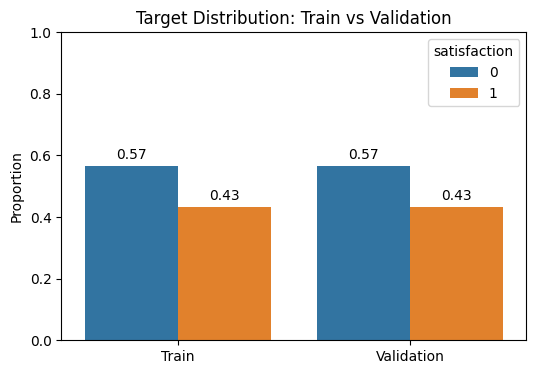

In [ ]:
dist_df = pd.DataFrame(
    {
        "Train": y_train.value_counts(normalize=True),
        "Validation": y_val.value_counts(normalize=True),
    }
).reset_index()

dist_df = dist_df.rename(columns={"index": "satisfaction"})
dist_long = dist_df.melt(
    id_vars="satisfaction", var_name="split", value_name="proportion"
)

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=dist_long, x="split", y="proportion", hue="satisfaction")

ax.set_ylim(0, 1)
ax.set_title("Target Distribution: Train vs Validation")
ax.set_ylabel("Proportion")
ax.set_xlabel("")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.show()

### Satisfaction Rate by Categorical Features

We visualize how passenger satisfaction varies across key categorical segments.

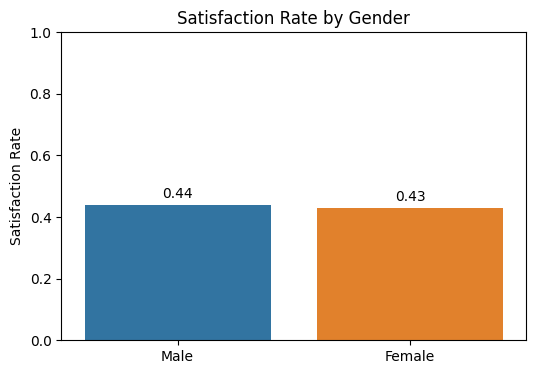

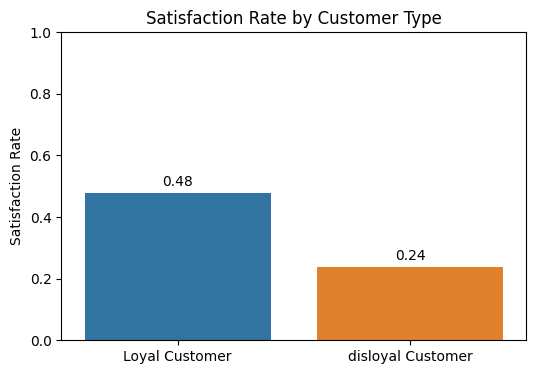

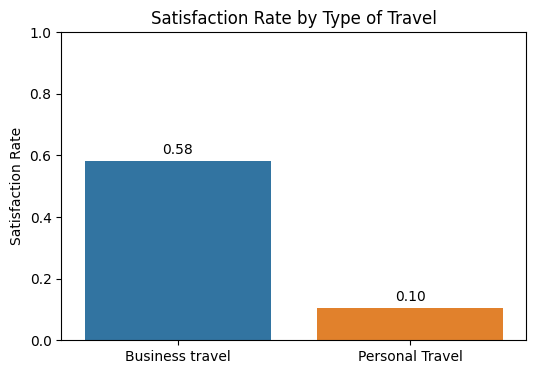

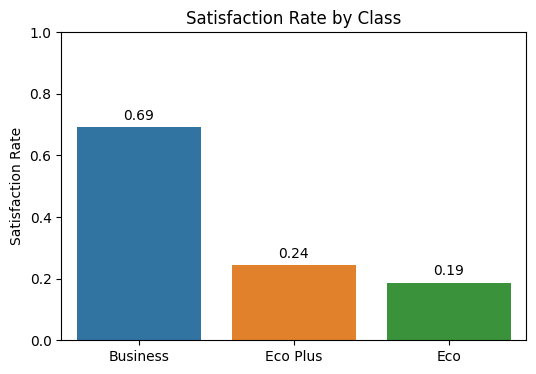

In [ ]:
for col in cat_cols:
    tmp = (
        pd.concat([X_train[col], y_train], axis=1)
        .groupby(col)["satisfaction"]
        .mean()
        .reset_index()
        .rename(columns={"satisfaction": "satisfaction_rate"})
        .sort_values("satisfaction_rate", ascending=False)
    )

    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=tmp, x=col, y="satisfaction_rate")
    ax.set_ylim(0, 1)
    ax.set_title(f"Satisfaction Rate by {col}")
    ax.set_ylabel("Satisfaction Rate")
    ax.set_xlabel("")

    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3)

    plt.xticks(rotation=0)
    plt.show()

**Interpretation**

Passenger satisfaction varies strongly across several categorical features.
While gender shows almost no difference, travel-related variables are highly discriminative.

- **Customer Type**: Loyal customers have a substantially higher satisfaction rate than disloyal ones.
- **Type of Travel**: Business travel is associated with much higher satisfaction compared to personal travel.
- **Class**: Satisfaction increases significantly with higher travel class, peaking for Business class passengers.

These patterns suggest that expectations and service context play a more important role
than demographic characteristics in determining passenger satisfaction.

### Satisfaction vs Flight Delays

We compare arrival and departure delays between satisfied and unsatisfied passengers.

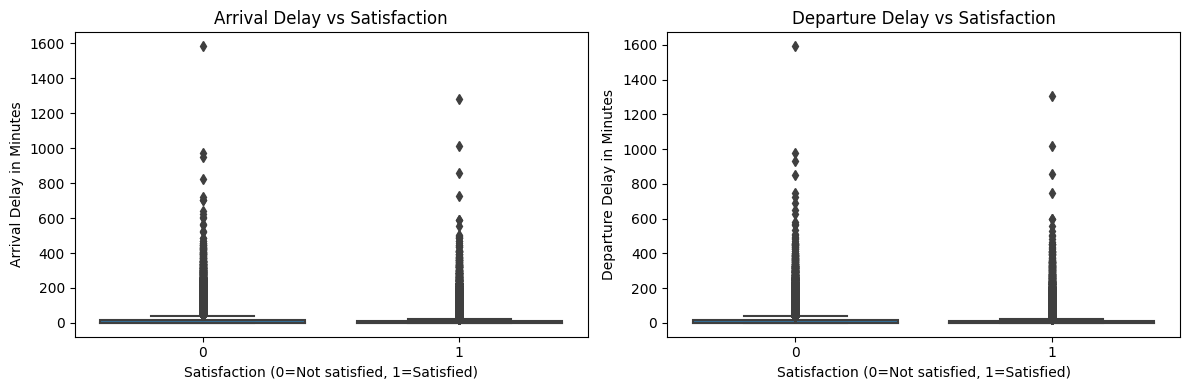

In [ ]:
delay_df = pd.concat(
    [X_train[["Arrival Delay in Minutes", "Departure Delay in Minutes"]], y_train],
    axis=1,
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=delay_df, x="satisfaction", y="Arrival Delay in Minutes")
ax1.set_title("Arrival Delay vs Satisfaction")
ax1.set_xlabel("Satisfaction (0=Not satisfied, 1=Satisfied)")

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(data=delay_df, x="satisfaction", y="Departure Delay in Minutes")
ax2.set_title("Departure Delay vs Satisfaction")
ax2.set_xlabel("Satisfaction (0=Not satisfied, 1=Satisfied)")

plt.tight_layout()
plt.show()

**Interpretation**

Both arrival and departure delays show a clear relationship with passenger satisfaction.
Unsatisfied passengers (label 0) tend to experience higher delays on average and exhibit
a wider spread, including extreme outliers.

Satisfied passengers (label 1) are mostly concentrated around low or zero delay values,
indicating that punctuality is a strong driver of overall satisfaction.

### Satisfaction vs Service Quality Scores

We compare average service ratings between satisfied and unsatisfied passengers
to understand which service dimensions are most associated with satisfaction.

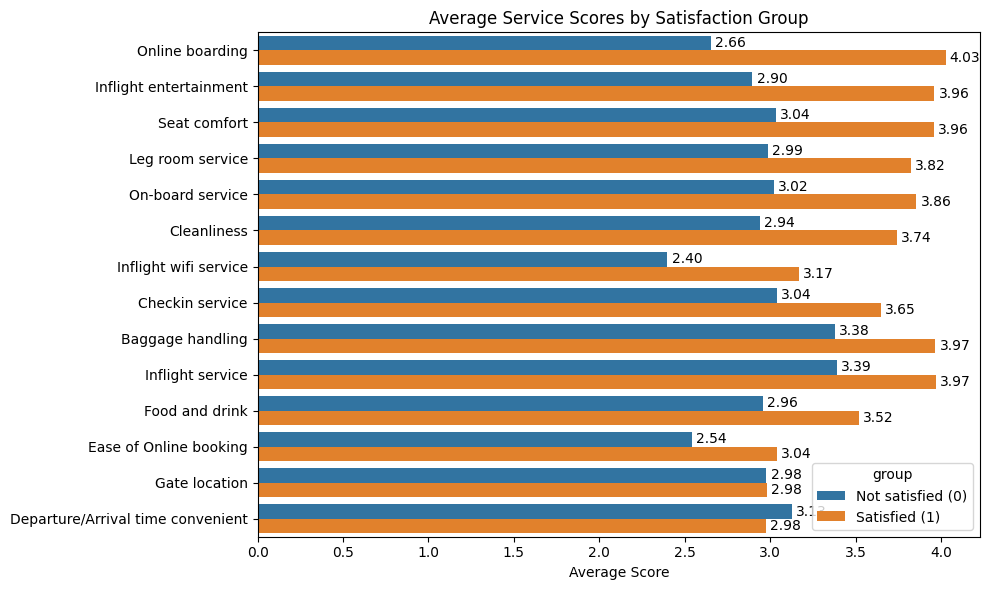

In [ ]:
service_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
]

# average score by satisfaction
avg_scores = X_train[service_cols].copy()
avg_scores["satisfaction"] = y_train

avg_scores = avg_scores.groupby("satisfaction")[service_cols].mean().T
avg_scores = avg_scores.rename(columns={0: "Not satisfied (0)", 1: "Satisfied (1)"})
avg_scores["gap"] = avg_scores["Satisfied (1)"] - avg_scores["Not satisfied (0)"]
avg_scores = avg_scores.sort_values("gap", ascending=False)

plot_df = (
    avg_scores[["Not satisfied (0)", "Satisfied (1)"]]
    .reset_index()
    .rename(columns={"index": "service"})
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=plot_df.melt(id_vars="service", var_name="group", value_name="avg_score"),
    y="service",
    x="avg_score",
    hue="group",
    orient="h",
)

ax.set_title("Average Service Scores by Satisfaction Group")
ax.set_xlabel("Average Score")
ax.set_ylabel("")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()

**Interpretation**

Service quality scores show a strong and consistent separation between
satisfied and unsatisfied passengers.

The largest gaps are observed in:
- **Online boarding**
- **Inflight entertainment**
- **Seat comfort**
- **On-board service**
- **Leg room service**

These features have substantially higher average scores among satisfied passengers,
suggesting that the perceived quality of in-flight experience and digital touchpoints
plays a critical role in overall satisfaction.

In contrast, features such as **Gate location** and **Departure/Arrival time convenience**
show minimal differences, indicating weaker discriminative power

### Satisfaction vs Age and Flight Distance

We compare age and flight distance distributions between satisfied and unsatisfied passengers
to understand whether these basic characteristics are strongly associated with satisfaction.

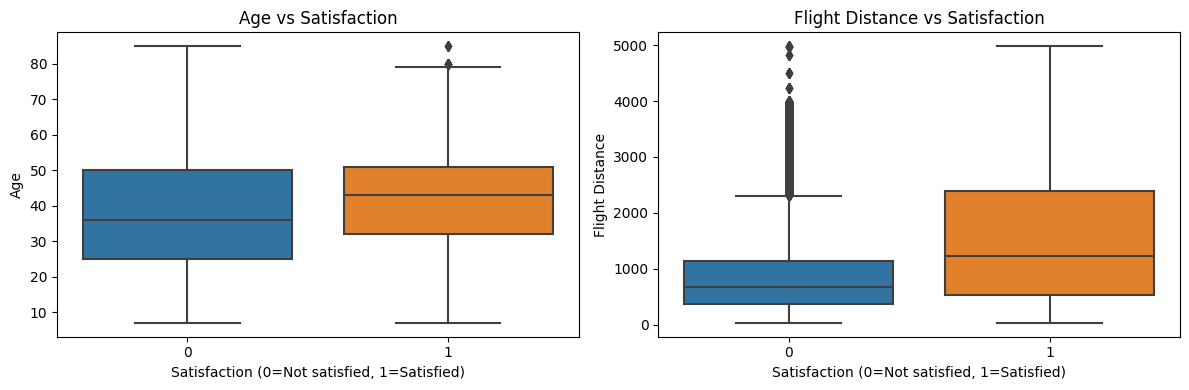

In [46]:
basic_df = pd.concat([X_train[["Age", "Flight Distance"]], y_train], axis=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=basic_df, x="satisfaction", y="Age")
ax1.set_title("Age vs Satisfaction")
ax1.set_xlabel("Satisfaction (0=Not satisfied, 1=Satisfied)")

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(data=basic_df, x="satisfaction", y="Flight Distance")
ax2.set_title("Flight Distance vs Satisfaction")
ax2.set_xlabel("Satisfaction (0=Not satisfied, 1=Satisfied)")

plt.tight_layout()
plt.show()

**Interpretation**

Age shows only a mild difference between satisfied and unsatisfied passengers,
suggesting that demographic factors alone are not strong drivers of satisfaction.

In contrast, flight distance displays a clearer separation.
Satisfied passengers tend to have longer flight distances on average,
indicating that long-haul travelers may have different expectations
and benefit more from service-related features.

### Category Size (Count) + Satisfaction Rate

We visualize category sizes alongside satisfaction rates.
This prevents misleading interpretations driven by very small sample groups.

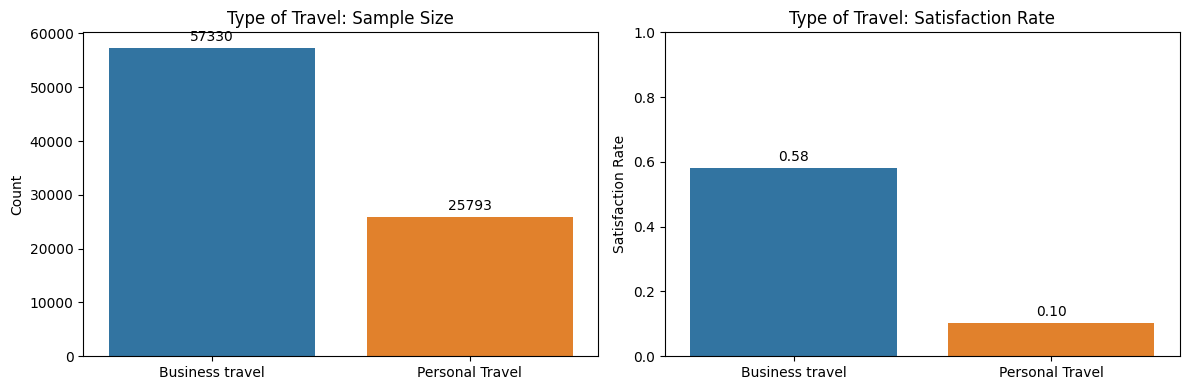

In [ ]:
col = "Type of Travel"  # we start with the most discriminative one

tmp = pd.concat([X_train[col], y_train], axis=1)

summary = (
    tmp.groupby(col)
    .agg(count=("satisfaction", "size"), satisfaction_rate=("satisfaction", "mean"))
    .reset_index()
    .sort_values("satisfaction_rate", ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
ax1 = sns.barplot(data=summary, x=col, y="count", ax=axes[0])
ax1.set_title(f"{col}: Sample Size")
ax1.set_xlabel("")
ax1.set_ylabel("Count")
for container in ax1.containers:
    ax1.bar_label(container, fmt="%d", padding=3)

# Satisfaction rate plot
ax2 = sns.barplot(data=summary, x=col, y="satisfaction_rate", ax=axes[1])
ax2.set_title(f"{col}: Satisfaction Rate")
ax2.set_xlabel("")
ax2.set_ylabel("Satisfaction Rate")
ax2.set_ylim(0, 1)
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()

**Interpretation**

The large sample size for both travel types confirms that the observed
difference in satisfaction rate is reliable.

Personal travel passengers constitute a substantial portion of the dataset,
yet their satisfaction rate is extremely low compared to business travelers.
This indicates a genuine structural difference rather than a small-sample artifact.

### Category Size (Count) + Satisfaction Rate — Class

We check both sample size and satisfaction rate across travel classes
to ensure the observed differences are supported by sufficient data.

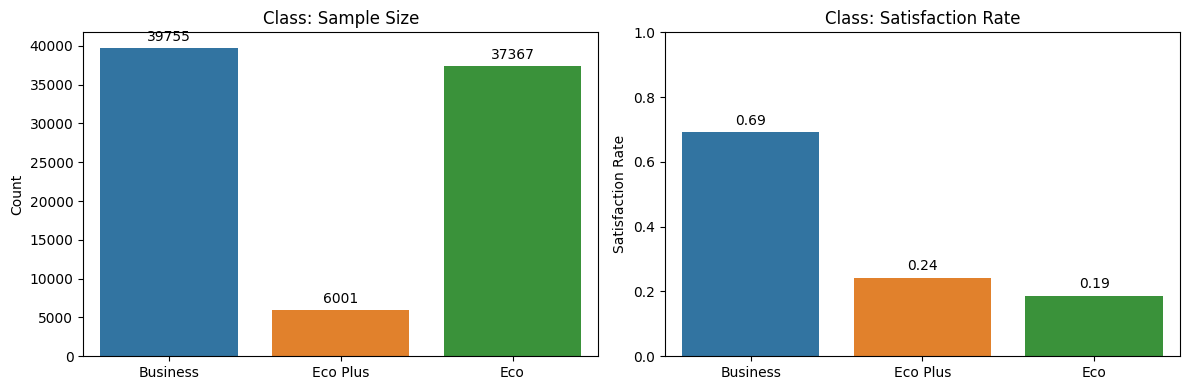

In [ ]:
col = "Class"

tmp = pd.concat([X_train[col], y_train], axis=1)

summary = (
    tmp.groupby(col)
    .agg(count=("satisfaction", "size"), satisfaction_rate=("satisfaction", "mean"))
    .reset_index()
    .sort_values("satisfaction_rate", ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ax1 = sns.barplot(data=summary, x=col, y="count", ax=axes[0])
ax1.set_title("Class: Sample Size")
ax1.set_xlabel("")
ax1.set_ylabel("Count")
for container in ax1.containers:
    ax1.bar_label(container, fmt="%d", padding=3)

ax2 = sns.barplot(data=summary, x=col, y="satisfaction_rate", ax=axes[1])
ax2.set_title("Class: Satisfaction Rate")
ax2.set_xlabel("")
ax2.set_ylabel("Satisfaction Rate")
ax2.set_ylim(0, 1)
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()

**Interpretation**

Business and Economy classes both have large sample sizes, which makes the
observed differences in satisfaction rate reliable.

Business class passengers show a substantially higher satisfaction rate,
while Economy and Eco Plus classes have much lower rates despite having
significant representation in the dataset.

This confirms that travel class is a strong and stable predictor of passenger
satisfaction, not driven by sample size imbalance.

### Correlation Between Service Quality Features

We visualize correlations among service rating features to understand
which variables move together and may carry overlapping information.

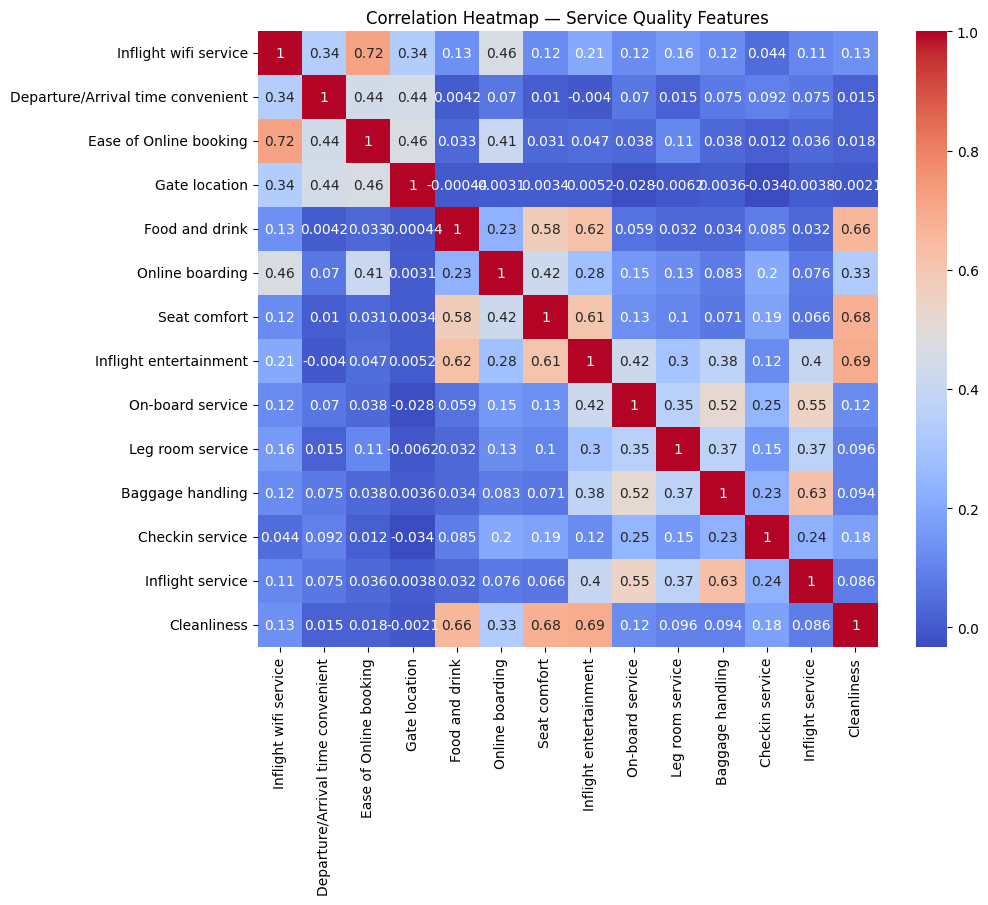

In [ ]:
plt.figure(figsize=(10, 8))
corr = X_train[service_cols].corr()

ax = sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — Service Quality Features")
plt.show()

**Interpretation**

Service quality features show mostly **moderate correlations**, with a few
clusters of related variables.

Notable correlations appear between:
- **Seat comfort – Inflight entertainment – Cleanliness**
- **Food and drink – Inflight entertainment**
- **Baggage handling – Inflight service**

While some overlap exists, correlations are not excessively high, suggesting that
most service features still provide complementary information.
This supports the use of all service-related variables in a baseline linear model,
while keeping multicollinearity in mind during interpretation.

### Correlation With Target (Numeric Features Only)

We visualize correlations between the target (`satisfaction`) and numerical features.
This provides a quick sense of which numeric variables are most linearly associated
with satisfaction.

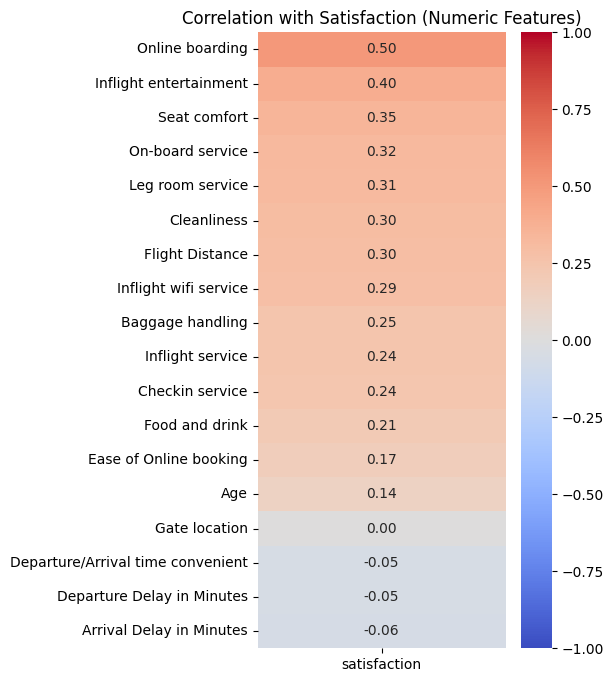

In [ ]:
tmp = pd.concat([X_train[num_cols], y_train], axis=1)

corr_target = (
    tmp.corr()["satisfaction"].drop("satisfaction").sort_values(ascending=False)
)

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    corr_target.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1
)
plt.title("Correlation with Satisfaction (Numeric Features)")
plt.show()

**Interpretation**

Passenger satisfaction shows the strongest positive correlations with
service-related features, particularly:

- **Online boarding**
- **Inflight entertainment**
- **Seat comfort**
- **On-board service**

These results are fully consistent with earlier EDA findings and confirm that
perceived service quality is the primary driver of satisfaction.

Delay-related features show weak negative correlations, suggesting that while
delays matter, they are not the dominant factor compared to in-flight experience.

Overall, this correlation analysis supports the inclusion of service quality,
flight distance, and selected operational features in a baseline linear model.

## 10. Baseline Model — Logistic Regression

In this section, we build a simple and interpretable baseline model using
**Logistic Regression**.

All available features are used:
- numerical features (age, flight distance, delays, service quality scores),
- categorical features (gender, customer type, type of travel, and class).

Missing values are handled within the preprocessing pipeline to avoid data leakage.
Categorical features are one-hot encoded, and numerical features are scaled.

Model performance is evaluated using:
**precision, recall, f1-score, and support**.
Accuracy is reported only as a supplementary reference.

### Preprocessing and Model Setup

Numerical features are imputed with the median and scaled.
Categorical features are imputed with the most frequent value and one-hot encoded.

The preprocessing steps and the Logistic Regression model are combined
into a single pipeline.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Numeric preprocessing
num_pipeline = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Categorical preprocessing
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Full preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols),
    ]
)

# Logistic Regression model
baseline_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LogisticRegression(max_iter=1000, random_state=42)),
    ]
)

# Fit model on training data
baseline_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainmen...
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

### Validation Set Evaluation

The baseline model is evaluated on the validation set using
precision, recall, f1-score, and support.

A confusion matrix is also shown to better understand the types of errors made.

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11776
           1       0.87      0.84      0.86      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



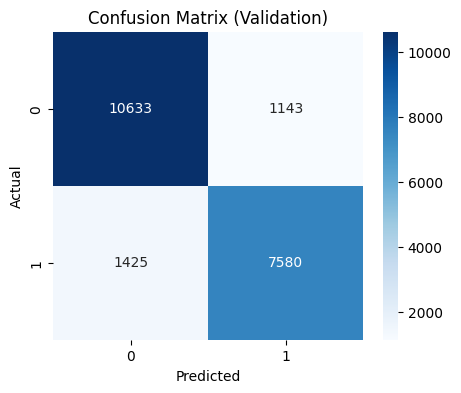

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on validation set
y_val_pred = baseline_model.predict(X_val)

# Accuracy (supplementary)
accuracy_score(y_val, y_val_pred)

# Classification report
print(classification_report(y_val, y_val_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set_title("Confusion Matrix (Validation)")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

### Validation Results Interpretation

The baseline Logistic Regression model achieves solid and balanced performance
across both classes.

- Class 0 (not satisfied) is slightly easier to predict, with higher recall.
- Class 1 (satisfied) shows lower recall, indicating that some satisfied passengers
  are predicted as not satisfied.

The confusion matrix reveals that false negatives are slightly more frequent
than false positives, suggesting a mild tendency to underpredict satisfaction.

Overall, this model provides a strong and interpretable baseline, serving as
a reliable reference point for more complex models.

## 11. Interpreting Logistic Regression Coefficients

Logistic Regression provides interpretable coefficients that indicate
the direction and strength of each feature’s association with passenger satisfaction.

Positive coefficients increase the likelihood of satisfaction,
while negative coefficients decrease it.

### Extracting Feature Names

After one-hot encoding categorical variables, we reconstruct the full feature list
to correctly map model coefficients to their corresponding features.

In [ ]:
# get feature names after preprocessing
num_features = num_cols

cat_features = (
    baseline_model.named_steps["preprocess"]
    .named_transformers_["cat"]
    .named_steps["encoder"]
    .get_feature_names_out(cat_cols)
)

all_features = np.concatenate([num_features, cat_features])

# extract coefficients
coefficients = baseline_model.named_steps["model"].coef_[0]

coef_df = pd.DataFrame(
    {"feature": all_features, "coefficient": coefficients}
).sort_values("coefficient", ascending=False)

coef_df.head()

,feature,coefficient
22,Type of Travel_Business travel,1.033953
7,Online boarding,0.819265
20,Customer Type_Loyal Customer,0.704666
2,Inflight wifi service,0.529694
13,Checkin service,0.411394


### Most Influential Features

We visualize the most positive and most negative coefficients
to understand which features drive satisfaction predictions.

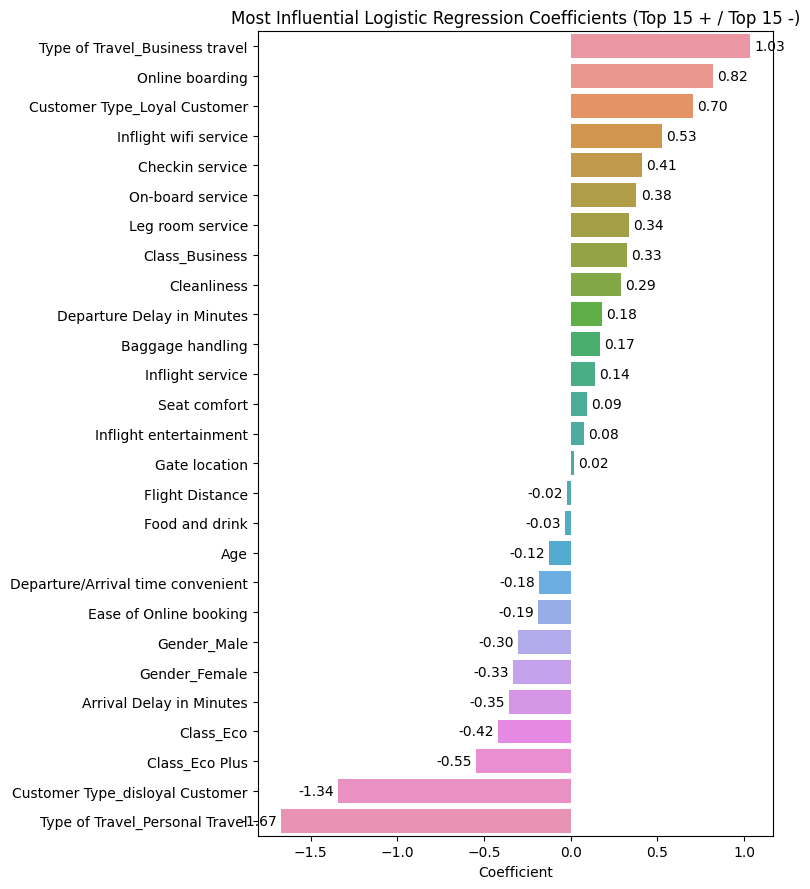

In [ ]:
top_pos = coef_df.head(15)
top_neg = coef_df.tail(15)

plot_df = pd.concat([top_pos, top_neg], axis=0)

plt.figure(figsize=(8, 9))
ax = sns.barplot(data=plot_df, y="feature", x="coefficient")

ax.set_title("Most Influential Logistic Regression Coefficients (Top 15 + / Top 15 -)")
ax.set_xlabel("Coefficient")
ax.set_ylabel("")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()

### Interpretation

The Logistic Regression coefficients strongly align with both the exploratory analysis
and business intuition.

The strongest positive drivers of satisfaction are:
- **Type of Travel: Business travel**
- **Online boarding**
- **Customer Type: Loyal Customer**

This indicates that business-oriented, digitally smooth travel experiences and customer
loyalty substantially increase the likelihood of passenger satisfaction.

Service-related features such as inflight Wi-Fi, check-in service, on-board service,
leg room service, and cleanliness also contribute positively, confirming that perceived
service quality plays a central role.

On the negative side, the strongest drivers of dissatisfaction are:
- **Type of Travel: Personal Travel**
- **Customer Type: Disloyal Customer**
- **Lower travel classes (Eco and Eco Plus)**

Delay-related features (especially arrival delay) and certain demographic indicators
show negative but relatively smaller effects compared to travel context and service quality.

Overall, the model learns a coherent and interpretable structure: satisfaction is primarily
driven by travel purpose, loyalty status, and service experience rather than demographic
characteristics alone.

## 12. Tree-Based Model — Random Forest

We train a tree-based model to capture non-linear patterns and feature interactions
that a linear model (Logistic Regression) may miss.

We keep preprocessing consistent:
- missing values are imputed,
- categorical variables are one-hot encoded,
- numerical variables are not strictly required to be scaled for trees, but we keep
  the same preprocessing structure for simplicity and consistency.

Evaluation is reported on the validation set using precision, recall, f1-score, and support
(accuracy is shown as a quick reference).

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



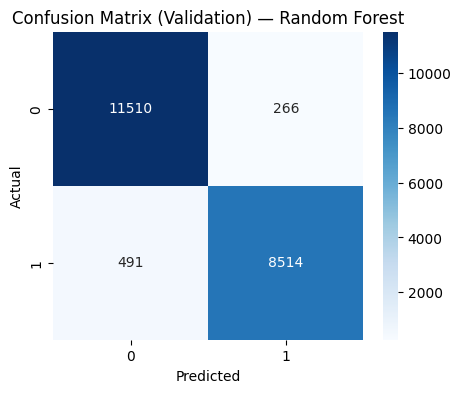

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

rf_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)),
    ]
)

rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)

# Accuracy (supplementary)
accuracy_score(y_val, y_val_pred_rf)

# Classification report
print(classification_report(y_val, y_val_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
ax.set_title("Confusion Matrix (Validation) — Random Forest")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

### Validation Results Interpretation — Random Forest

The Random Forest model significantly outperforms the Logistic Regression baseline
across all evaluation metrics.

- Overall **accuracy increases from ~0.88 to ~0.96**, indicating much stronger
  generalization on the validation set.
- For **Class 1 (Satisfied passengers)**:
  - Precision improves to **0.97**
  - Recall improves notably to **0.95**
  - F1-score reaches **0.96**

The confusion matrix highlights the key improvement:
- **False Negatives drop sharply** (from ~1400 in Logistic Regression to **491**),
  meaning the model is far better at correctly identifying satisfied passengers.
- False Positives are also substantially reduced.

This improvement suggests that non-linear patterns and feature interactions—especially
among service quality scores and travel context variables—play a crucial role in
predicting passenger satisfaction, which the tree-based model captures more effectively
than a linear model.

### Model Comparison (Validation)

We compare the baseline Logistic Regression model with the Random Forest model
using validation-set performance.

The comparison focuses on:
- overall accuracy,
- and **Class 1 (Satisfied passengers)** precision, recall, and f1-score,
as improving satisfaction detection is the primary objective.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


def eval_summary(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, sup = precision_recall_fscore_support(
        y_true, y_pred, labels=[1], average=None
    )
    return {
        "model": model_name,
        "accuracy": acc,
        "precision (class 1)": prec[0],
        "recall (class 1)": rec[0],
        "f1-score (class 1)": f1[0],
        "support (class 1)": sup[0],
    }


# Predictions
y_val_pred_lr = baseline_model.predict(X_val)
y_val_pred_rf = rf_model.predict(X_val)

# Comparison table
comparison_df = pd.DataFrame(
    [
        eval_summary(y_val, y_val_pred_lr, "Logistic Regression"),
        eval_summary(y_val, y_val_pred_rf, "Random Forest"),
    ]
)

comparison_df

,model,accuracy,precision (class 1),recall (class 1),f1-score (class 1),support (class 1)
0,Logistic Regression,0.876426,0.868967,0.841755,0.855144,9005
1,Random Forest,0.963572,0.969704,0.945475,0.957436,9005


**Interpretation**

The validation results show a clear and consistent improvement when moving
from Logistic Regression to Random Forest.

Compared to Logistic Regression:
- **Accuracy** increases from **0.876** to **0.964**, indicating substantially better
  overall classification performance.
- For **Class 1 (Satisfied passengers)**:
  - **Precision** improves from **0.87 → 0.97**, meaning fewer unsatisfied passengers
    are incorrectly predicted as satisfied.
  - **Recall** improves from **0.84 → 0.95**, showing a major reduction in false negatives
    and a much better ability to identify satisfied passengers.
  - **F1-score** increases from **0.86 → 0.96**, reflecting a significantly stronger
    balance between precision and recall.

These improvements confirm that Random Forest captures non-linear patterns and
feature interactions that Logistic Regression cannot model.
Based on validation performance, Random Forest is clearly the stronger model
and is selected for further analysis before final test evaluation.

### Random Forest Feature Importance (Permutation Importance)

We use **permutation importance** to measure how much each feature contributes to
model performance on the validation set.

This method is model-agnostic and more reliable than impurity-based importance
when features are correlated.

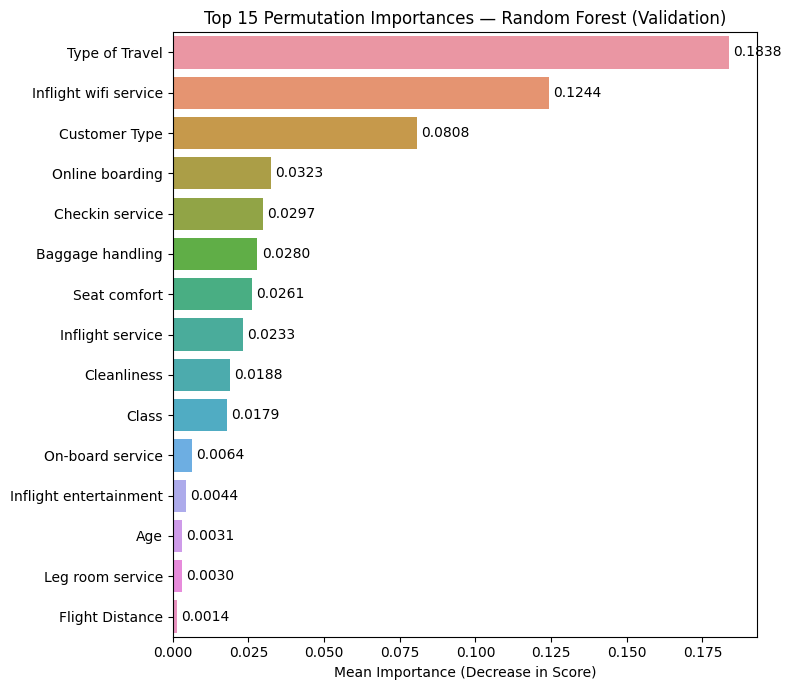

,feature,importance_mean,importance_std
3,Type of Travel,0.183774,0.001103
6,Inflight wifi service,0.124412,0.001888
1,Customer Type,0.080776,0.000782
11,Online boarding,0.032318,0.000654
17,Checkin service,0.029662,0.000462
16,Baggage handling,0.027997,0.000677
12,Seat comfort,0.026053,0.000550
18,Inflight service,0.023319,0.000614
19,Cleanliness,0.018815,0.000729
4,Class,0.017882,0.000575


In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# permutation importance on validation set
perm = permutation_importance(
    rf_model, X_val, y_val, n_repeats=5, random_state=42, n_jobs=-1
)

# use ORIGINAL feature names (before encoding)
feature_names = X_val.columns

imp_df = pd.DataFrame(
    {
        "feature": feature_names,
        "importance_mean": perm.importances_mean,
        "importance_std": perm.importances_std,
    }
).sort_values("importance_mean", ascending=False)

top_imp = imp_df.head(15)

plt.figure(figsize=(8, 7))
ax = sns.barplot(data=top_imp, y="feature", x="importance_mean")

ax.set_title("Top 15 Permutation Importances — Random Forest (Validation)")
ax.set_xlabel("Mean Importance (Decrease in Score)")
ax.set_ylabel("")

for container in ax.containers:
    ax.bar_label(container, fmt="%.4f", padding=3)

plt.tight_layout()
plt.show()

top_imp

### Interpretation — Random Forest Permutation Importance

Permutation importance results clearly identify the most influential features
driving passenger satisfaction predictions.

The strongest contributor by a large margin is **Type of Travel**, confirming that
the context of travel (business vs personal) is the dominant factor for satisfaction.
This is fully consistent with earlier EDA and Logistic Regression coefficients.

Other highly influential features include:
- **Inflight WiFi service**
- **Customer Type**
- **Online boarding**
- **Check-in service**

These results highlight the importance of digital touchpoints and service experience,
which aligns strongly with the service score analyses conducted during EDA.

Traditional demographic or structural variables such as **Age** and **Flight Distance**
show very low importance, indicating that satisfaction is driven far more by experience
and travel context than by passenger demographics.

Overall, the permutation importance analysis validates that the Random Forest model
learns meaningful, business-relevant patterns rather than spurious correlations.

### Feature-Reduced Random Forest (Validation Check)

We train a simplified Random Forest using only the most important features
(from permutation importance) to check whether we can keep performance high
with a smaller, more interpretable feature set.

If performance stays similar, the reduced model becomes a strong candidate for final evaluation.

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11776
           1       0.96      0.93      0.95      9005

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



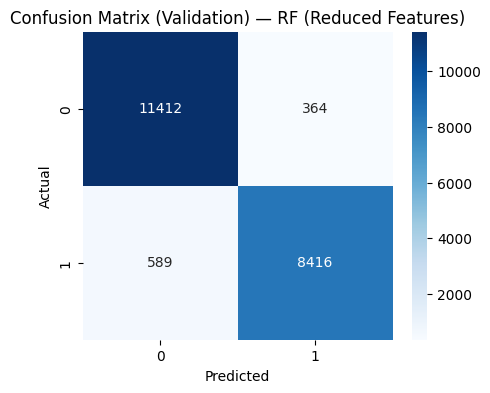

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Top features from permutation importance (use the same order you observed)
top_features = [
    "Type of Travel",
    "Inflight wifi service",
    "Customer Type",
    "Online boarding",
    "Checkin service",
    "Baggage handling",
    "Seat comfort",
    "Inflight service",
    "Cleanliness",
    "Class",
]

# Reduced preprocessing: only keep these columns, then preprocess
num_cols_red = [c for c in top_features if c in num_cols]
cat_cols_red = [c for c in top_features if c in cat_cols]

num_pipeline_red = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

cat_pipeline_red = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocess_red = ColumnTransformer(
    transformers=[
        ("num", num_pipeline_red, num_cols_red),
        ("cat", cat_pipeline_red, cat_cols_red),
    ]
)

rf_model_reduced = Pipeline(
    steps=[
        ("preprocess", preprocess_red),
        ("model", RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)),
    ]
)

rf_model_reduced.fit(X_train[top_features], y_train)

y_val_pred_rf_red = rf_model_reduced.predict(X_val[top_features])

# Accuracy (supplementary)
accuracy_score(y_val, y_val_pred_rf_red)

# Classification report
print(classification_report(y_val, y_val_pred_rf_red))

# Confusion matrix
cm_red = confusion_matrix(y_val, y_val_pred_rf_red)

plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm_red, annot=True, fmt="d", cmap="Blues")
ax.set_title("Confusion Matrix (Validation) — RF (Reduced Features)")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

### Interpretation — Feature-Reduced Random Forest

The feature-reduced Random Forest model maintains strong performance while using
a significantly smaller feature set.

- Overall **accuracy decreases slightly from ~0.96 to ~0.95**, indicating only a
  minimal loss in overall performance.
- For **Class 1 (Satisfied passengers)**:
  - **Precision remains high** at **0.96**
  - **Recall drops from ~0.95 to ~0.93**, meaning slightly more satisfied passengers
    are missed compared to the full Random Forest model.
  - **F1-score decreases modestly from ~0.96 to ~0.95**

The confusion matrix confirms this trade-off:
- **False Negatives increase** (from ~491 in full RF to **589**), indicating reduced
  sensitivity for detecting satisfied passengers.
- False Positives remain low and comparable.

Overall, the reduced model offers improved simplicity and interpretability at the
cost of a small decrease in recall for the satisfied class.

## 13. Final Model Evaluation — Test Set (Full Random Forest)

We evaluate the selected final model (Full Random Forest) on the holdout test set.
This provides an unbiased estimate of real-world performance.

We report:
precision, recall, f1-score, and support (accuracy is shown as a quick reference).

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



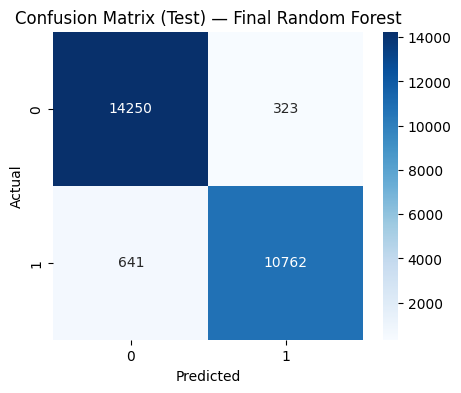

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split test set into X / y
X_test = test_df.drop(columns=["satisfaction"])
y_test = test_df["satisfaction"]

# Predict with the already-trained full RF model
y_test_pred = rf_model.predict(X_test)

# Accuracy (supplementary)
accuracy_score(y_test, y_test_pred)

# Classification report
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
ax = sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
ax.set_title("Confusion Matrix (Test) — Final Random Forest")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

### Final Results Interpretation (Test Set)

The final Random Forest model generalizes strongly to the holdout test set.

- Overall **accuracy is 0.96**, confirming high performance outside the training/validation split.
- For **Class 1 (Satisfied passengers)**:
  - **Precision = 0.97**
  - **Recall = 0.94**
  - **F1-score = 0.96**

The confusion matrix indicates:
- **FN = 641** and **FP = 323**, meaning the model is more likely to miss some satisfied passengers
  than to incorrectly label unsatisfied passengers as satisfied.

Overall, the model demonstrates robust and consistent generalization and maintains
a strong balance between precision and recall on the test set.

## 14. Data Leakage Sanity Checks

Given the strong and consistent performance between validation and test sets,
we perform a series of sanity checks to ensure that no data leakage is present.

These checks focus on:
- potential duplicate observations between train and test sets,
- similarity of target distributions,
- and feature behavior consistency.

### Duplicate Observation Check

We check whether any identical rows (excluding the target variable) appear in both
the training and test datasets, which could indicate data leakage.

In [72]:
# Compare train and test rows (excluding target)
train_features = train_df.drop(columns=["satisfaction"])
test_features = test_df.drop(columns=["satisfaction"])

# Convert rows to tuples for fast comparison
train_rows = set(map(tuple, train_features.values))
test_rows = set(map(tuple, test_features.values))

intersection_count = len(train_rows.intersection(test_rows))
intersection_count

0

The duplicate row check shows **zero** overlap between training and
test sets. This confirms that no identical observations are shared across splits,
reducing the likelihood of data leakage due to duplicated samples.


### Target Distribution Consistency

We compare the satisfaction class distribution between training and test sets to
ensure that performance similarity is not caused by extreme class imbalance shifts.

In [ ]:
pd.DataFrame(
    {
        "train_proportion": y_train.value_counts(normalize=True),
        "test_proportion": y_test.value_counts(normalize=True),
    }
)

,train_proportion,test_proportion
satisfaction,,
0,0.566666,0.561018
1,0.433334,0.438982


### Interpretation

The satisfaction class distributions in the training and test sets are highly similar.

- **Training set:**  
  - Class 0 (Not satisfied): **56.67%**  
  - Class 1 (Satisfied): **43.33%**

- **Test set:**  
  - Class 0 (Not satisfied): **56.10%**  
  - Class 1 (Satisfied): **43.90%**

The minor differences observed are well within expected random variation and do not
indicate any distribution shift or leakage-related artifacts.

This confirms that the strong test performance is not driven by target distribution
bias, but reflects genuine generalization of the model.

### Feature Behavior Consistency

We qualitatively verify that the most important features identified during:
- EDA,
- Logistic Regression coefficients,
- Random Forest permutation importance,

remain consistent across different stages of the analysis.

### Final Leakage Assessment

Based on duplicate checks, target distribution consistency, and feature behavior analysis,
there is **no evidence of data leakage** in the modeling pipeline.

The strong generalization performance observed on the test set is therefore attributed
to meaningful signal in the feature space and the model’s ability to capture non-linear
relationships, rather than to information leakage.

## 15. Final Conclusion & Key Takeaways

In this project, we built and evaluated multiple models to predict airline passenger
satisfaction using a structured, end-to-end data science workflow.

**Key outcomes and insights:**

- Exploratory Data Analysis revealed that passenger satisfaction is primarily driven
  by **travel context (Type of Travel, Customer Type)** and **service quality features**
  rather than demographic variables such as age or flight distance.

- A **Logistic Regression baseline** provided interpretability but showed limited
  performance, especially in recall for satisfied passengers.

- A **Random Forest model** significantly improved performance by capturing non-linear
  relationships and feature interactions, achieving strong and stable results across
  validation and test sets.

- **Permutation importance analysis** consistently identified:
  *Type of Travel*, *Inflight WiFi service*, *Customer Type*, and *Online boarding*
  as the most influential features, aligning with both EDA findings and domain intuition.

- A **feature-reduced Random Forest** demonstrated that comparable performance can be
  achieved with fewer features, highlighting a clear trade-off between simplicity and
  maximum recall.

- Final evaluation on the holdout test set confirmed **robust generalization**,
  and multiple sanity checks showed **no evidence of data leakage**.

Overall, the final Random Forest model delivers strong predictive performance while
remaining explainable and well-supported by data-driven analysis. The workflow reflects
a production-ready approach that balances performance, interpretability, and methodological rigor.